In [1]:
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url,header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
df.columns = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]

In [20]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [21]:
df.drop(columns="Sex",inplace=True)

In [22]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


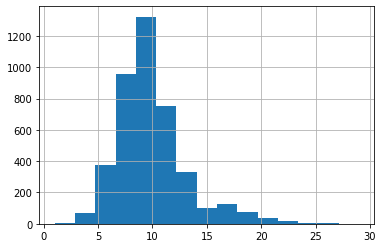

In [23]:
import matplotlib.pyplot as plt
df["Rings"].hist(bins=15)
plt.show()

In [26]:
correlation_matrix = df.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [28]:
#example...
import numpy as np
a = np.array([2,2])
b = np.array([4,4])
np.linalg.norm(a-b)

2.8284271247461903

In [36]:
X = df.drop(columns="Rings")# capital letter for matrix and small letter for vector...
X = X.values
y = df["Rings"]
y = y.values

In [37]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [38]:
y

array([15,  7,  9, ...,  9, 10, 12], dtype=int64)

In [39]:
new_datapoints = np.array([
     0.569552,
     0.446407,
     0.154437,
     1.016849,
     0.439051,
     0.222526,
     0.291208,
 ])


In [40]:
distance = np.linalg.norm(X - new_datapoints ,axis=1)

In [49]:
k=3
nearest_neighbor_ids = distance.argsort()[:k]
nearest_neighbor_ids

array([4045, 1902, 1644], dtype=int64)

In [46]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 9, 11, 10], dtype=int64)

In [50]:
prediction = nearest_neighbor_rings.mean()

In [51]:
prediction

10.0

In [42]:
##example for classification using mode...
import scipy.stats
dataset = np.array(["A","B","C","B","D"])
scipy.stats.mode(dataset)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
X.shape,X_train.shape

((4177, 7), (3341, 7))

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 3)

In [55]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [67]:
test_pred = knn_model.predict(X_test)

In [70]:
train_pred = knn_model.predict(X_train)

In [71]:
from sklearn.metrics import mean_squared_error
test_error = np.sqrt(mean_squared_error(y_test,test_pred))
train_error = np.sqrt(mean_squared_error(y_train,train_pred))

In [72]:
test_error

2.4594532226032095

In [73]:
train_error

1.6497495216909137

In [103]:
knn_model.predict([[0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208]])

array([10.])

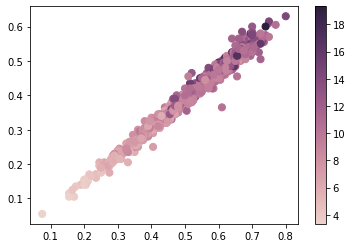

In [77]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f,ax = plt.subplots()
points = ax.scatter(X_test[:,0],X_test[:,1],c=test_pred,s=50,cmap=cmap)
f.colorbar(points)
plt.show()

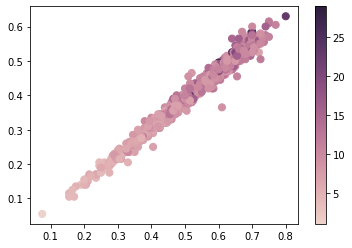

In [78]:
cmap1 = sns.cubehelix_palette(as_cmap=True)
f,ax = plt.subplots()
points = ax.scatter(X_test[:,0],X_test[:,1],cmap=cmap1,s=50,c=y_test)
f.colorbar(points)
plt.show()

In [81]:
# Tuning and optimizing the KNN performance using GridsearchCV...
from sklearn.model_selection import GridSearchCV
parameter = {"n_neighbors":range(1,50)}
grid_search = GridSearchCV(KNeighborsRegressor(),parameter)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [82]:
grid_search.best_params_

{'n_neighbors': 20}

In [83]:
train_pred_grid = grid_search.predict(X_train)
train_error_grid = np.sqrt(mean_squared_error(train_pred_grid,y_train))

In [84]:
train_error_grid #error increased compared to without tuning...

2.0103548167114997

In [85]:
test_pred_grid = grid_search.predict(X_test)
test_error_grid = np.sqrt(mean_squared_error(test_pred_grid,y_test))

In [86]:
test_error_grid #error decreased compared to without tuning...

2.35217183058002

In [89]:
# Adding weighted average of neighbors based on distance...
parameters = {"n_neighbors":range(1,50),"weights":["uniform","distance"]}
grid_search = GridSearchCV(KNeighborsRegressor(),parameters)
grid_search.fit(X_train,y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [88]:
grid_search.best_params_

{'n_neighbors': 20, 'weights': 'distance'}

In [90]:
train_preds_grids = grid_search.predict(X_train)
train_errors_grids = np.sqrt(mean_squared_error(train_preds_grids,y_train))

In [92]:
#Further improving on KNN using bagging...
best_k = grid_search.best_params_["n_neighbors"]
best_weights = grid_search.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k,weights=best_weights)
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn,n_estimators=100)

In [94]:
train_fit = bagging_model.fit(X_train,y_train)

In [95]:
train = bagging_model.predict(X_train)
errors = np.sqrt(mean_squared_error(train,y_train))

In [96]:
errors

0.7879028030558745

In [97]:
test = bagging_model.predict(X_test)
test_errors = np.sqrt(mean_squared_error(test,y_test))

In [98]:
test_errors

2.3366341203548013